In [1]:
import glob
import torch

from model import load_untrained_bert_base
from dataset_loading import load_tokenized_dataset, load_glue_sentence_classification

/local/scratch-3/fwe21/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pathlib import Path

dataset = load_tokenized_dataset(
    Path("../GLUE-baselines/glue_data/SST-2/"),
    load_glue_sentence_classification
)

In [3]:
checkpoints = sorted(glob.glob("../checkpoints/BERTbase_SST2_seed0/*"))
print(checkpoints)

['../checkpoints/BERTbase_SST2_seed0/2022-10-27_19:36:09', '../checkpoints/BERTbase_SST2_seed0/2022-10-27_20:50:27', '../checkpoints/BERTbase_SST2_seed0/2022-10-27_22:04:37', '../checkpoints/BERTbase_SST2_seed0/2022-10-27_23:18:31']


In [4]:
from finetune import run_epoch


model = load_untrained_bert_base()
device_ids = [0,1]
device = torch.device("cpu")
if device_ids is not None:
    if not torch.cuda.is_available():
        print("WARNING: [device_ids] was specified but CUDA is not available")
    else:
        device = torch.device("cuda")
        model = torch.nn.DataParallel(model, device_ids=device_ids)
        model.to(device)

train_losses = []
test_losses = []
test_accuracy = []
for checkpoint_path in checkpoints:
    checkpoint = torch.load(checkpoint_path)
    print(checkpoint.keys())

    model.load_state_dict(checkpoint["model_state_dict"])

    loss, accuracy = run_epoch(model,
        torch.utils.data.DataLoader(dataset["dev"], shuffle=False, batch_size=16),
        device
    )
    print(checkpoint["loss"], loss, accuracy)
    train_losses.append(checkpoint["loss"])
    test_losses.append(loss)
    test_accuracy.append(accuracy)


Loading model...
dict_keys(['epochs', 'model_state_dict', 'optimizer_state_dict', 'loss'])


  0%|          | 0/55 [00:00<?, ?it/s]/local/scratch-3/fwe21/miniconda3/envs/torch/lib/python3.9/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
100%|██████████| 55/55 [00:30<00:00,  1.79it/s]


tensor(0.4231) tensor(0.4597) 0.9105504587155964
dict_keys(['epochs', 'model_state_dict', 'optimizer_state_dict', 'loss'])


100%|██████████| 55/55 [00:33<00:00,  1.64it/s]


tensor(0.2264) tensor(0.5646) 0.8967889908256881
dict_keys(['epochs', 'model_state_dict', 'optimizer_state_dict', 'loss'])


100%|██████████| 55/55 [00:34<00:00,  1.58it/s]


tensor(0.1548) tensor(0.5385) 0.9162844036697247
dict_keys(['epochs', 'model_state_dict', 'optimizer_state_dict', 'loss'])


100%|██████████| 55/55 [00:36<00:00,  1.51it/s]

tensor(0.1141) tensor(0.5661) 0.9013761467889908


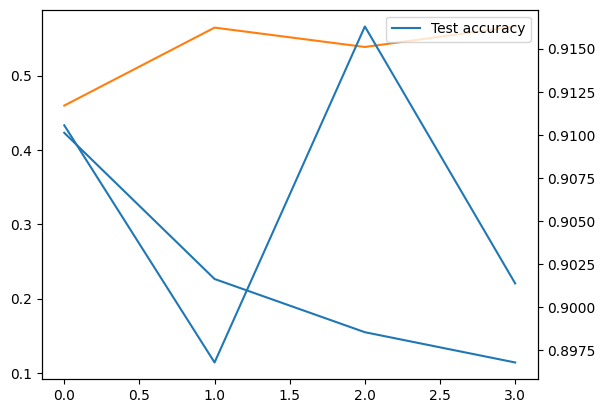

In [13]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.plot(train_losses,label="Train loss")
ax.plot(test_losses,label="Test loss")
plt.legend()

plt.show()
fig,ax = plt.subplots()
ax.plot(test_accuracy,label="Test accuracy")
plt.legend()
plt.show()

In [6]:
from model import load_untrained_bert_base

In [7]:
from transformers import AutoModelForSequenceClassification, BertConfig


In [8]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [9]:
torch.load("../models/pretrained_bert.pt").state_dict().keys()

odict_keys(['bert.embeddings.position_ids', 'bert.embeddings.word_embeddings.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.LayerNorm.weigh

In [10]:
model = torch.nn.DataParallel(model, device_ids=[0,1])
model.state_dict().keys()

odict_keys(['module.bert.embeddings.position_ids', 'module.bert.embeddings.word_embeddings.weight', 'module.bert.embeddings.position_embeddings.weight', 'module.bert.embeddings.token_type_embeddings.weight', 'module.bert.embeddings.LayerNorm.weight', 'module.bert.embeddings.LayerNorm.bias', 'module.bert.encoder.layer.0.attention.self.query.weight', 'module.bert.encoder.layer.0.attention.self.query.bias', 'module.bert.encoder.layer.0.attention.self.key.weight', 'module.bert.encoder.layer.0.attention.self.key.bias', 'module.bert.encoder.layer.0.attention.self.value.weight', 'module.bert.encoder.layer.0.attention.self.value.bias', 'module.bert.encoder.layer.0.attention.output.dense.weight', 'module.bert.encoder.layer.0.attention.output.dense.bias', 'module.bert.encoder.layer.0.attention.output.LayerNorm.weight', 'module.bert.encoder.layer.0.attention.output.LayerNorm.bias', 'module.bert.encoder.layer.0.intermediate.dense.weight', 'module.bert.encoder.layer.0.intermediate.dense.bias', 'mod